# Data preprocessing: Imputation of missing values

**NOTEBOOK GOAL**: Impute missing values

**DATASET TRANSFORMATION**: `preprocessed0_date_train.csv` >> `preprocessed1_imputed_train.csv`

**INDEX**
- [Missing values](#Missing-values)
- [Max_Gust_SpeedKm_h attribute processing](#Max_Gust_SpeedKm_h-attribute-processing)
- [Events attribute processing](#Events-attribute-processing)
- [NumberOfCustomers, NumberOfSales attributes processing](#NumberOfCustomers,-NumberOfSales-attributes-processing)
- [NumberOfCustomers attribute processing](#NumberOfCustomers-attribute-processing)
- [CloudCover attribute processing](#CloudCover-attribute-processing)
- [Min_VisibilitykM, Mean_VisibilityKm and-Max_VisibilityKm attributes processing](#Min_VisibilitykM,-Mean_VisibilityKm-and-Max_VisibilityKm-attributes-processing)
- [Final check](#Final-check)
- [Write to file](#Write-to-file)

In [1]:
from import_man import *

sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

%matplotlib inline

In [2]:
# start form preprocessed0_date_train dataset
df = pd.read_csv('./dataset/preprocessed0_date_train.csv')
df.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees,Day,DayOfYear,Month,Year
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,70,1029,1,6.0,0.0,23,1,61,3,2016
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,58,1025,1,10.0,0.0,56,2,62,3,2016
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,55,1023,2,8.0,0.0,22,4,64,3,2016
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,25,1022,-1,10.0,0.0,108,5,65,3,2016
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,48,1022,-5,5.0,0.0,46,6,66,3,2016


## Missing values

Let's check how many missing values are in the data set and how can we deal with them. 


In [3]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': df_na})
missing_data.head(10)

,Missing Ratio
Max_Gust_SpeedKm_h,78.380600
Events,23.727154
CloudCover,7.873680
Min_VisibilitykM,2.167791
Mean_VisibilityKm,2.167791
Max_VisibilityKm,2.167791


### Max_Gust_SpeedKm_h attribute processing

The attribute Max_Gust_SpeedKm_h has too many missing values... We have 2 possibility:

1. supposing that the missing values mean no Gust and replace them with 0
2. drop the column and do not take it into account for training


Let's consider the option n. 1 for the moment:

Let's see in the training set if there is any correlation between the number of Sales wrt 'Max_Gust_SpeedKm_h' when we impute the missing value with '0'


In [4]:
df_first = df
df_first['Max_Gust_SpeedKm_h'] = df_first['Max_Gust_SpeedKm_h'].fillna(0)

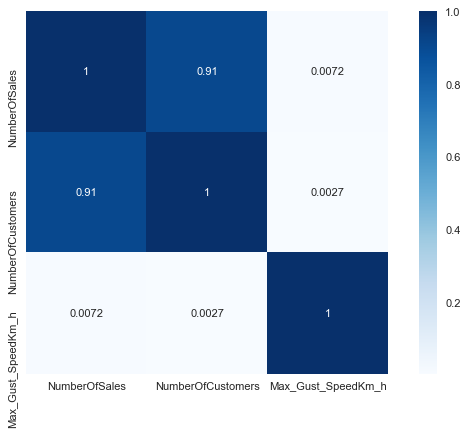

In [5]:
plt.rcParams['figure.figsize'] = [10.0,6.0]
plt.rcParams['figure.dpi']=80
covariance = df_first[['NumberOfSales','NumberOfCustomers','Max_Gust_SpeedKm_h']].corr(method='pearson')
sns.heatmap(covariance, square=True, annot=True, cmap="Blues")

'Max_Gust_SpeedKm_h seems to have no correlation with the targets.
Considering the fact that the 80% of the values have been imputed following the first option, the best option seems to be not consider that attribute for training.
Let's drop it.

In [6]:
# drop column Max_Gust_SpeedKm_h
print("Columns before ({}): {}".format(len(list(df.columns)), df.columns))

df = df.drop(['Max_Gust_SpeedKm_h'], axis=1)

print("Columns before ({}): {}".format(len(list(df.columns)), df.columns))

df.head()

Columns before (40): Index(['StoreID', 'Date', 'IsHoliday', 'IsOpen', 'HasPromotions', 'StoreType',
       'AssortmentType', 'NearestCompetitor', 'Region', 'NumberOfCustomers',
       'NumberOfSales', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK',
       'CloudCover', 'Events', 'Max_Dew_PointC', 'Max_Gust_SpeedKm_h',
       'Max_Humidity', 'Max_Sea_Level_PressurehPa', 'Max_TemperatureC',
       'Max_VisibilityKm', 'Max_Wind_SpeedKm_h', 'Mean_Dew_PointC',
       'Mean_Humidity', 'Mean_Sea_Level_PressurehPa', 'Mean_TemperatureC',
       'Mean_VisibilityKm', 'Mean_Wind_SpeedKm_h', 'Min_Dew_PointC',
       'Min_Humidity', 'Min_Sea_Level_PressurehPa', 'Min_TemperatureC',
       'Min_VisibilitykM', 'Precipitationmm', 'WindDirDegrees', 'Day',
       'DayOfYear', 'Month', 'Year'],
      dtype='object')
Columns before (39): Index(['StoreID', 'Date', 'IsHoliday', 'IsOpen', 'HasPromotions', 'StoreType',
       'AssortmentType', 'NearestCompetitor', 'Region', 'NumberOfCustomers',
       'Nu

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees,Day,DayOfYear,Month,Year
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,70,1029,1,6.0,0.0,23,1,61,3,2016
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,58,1025,1,10.0,0.0,56,2,62,3,2016
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,55,1023,2,8.0,0.0,22,4,64,3,2016
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,25,1022,-1,10.0,0.0,108,5,65,3,2016
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,48,1022,-5,5.0,0.0,46,6,66,3,2016


As a final outcome: **attribute Max_Gust_SpeedKm_h dropped**

### Events attribute processing

Now that Max_Gust_SpeedKm_h is gone let's continue with the imputation.

The next attribute is 'Events' with a missing ratio of 24%.
If we analyze the Events we notice that values like 'sunny' never appear so the best option seems to assume that missing values mean no particulare forcasting events.
Let's fill them with the value 'none'.

In [7]:
df["Events"] = df["Events"].fillna("None")

### NumberOfCustomers, NumberOfSales attributes processing


Let's set the NumberOfCustomers and NumberOfSales to None when the store is closed.

In [8]:
df.loc[df['IsOpen'] == 0, ['NumberOfCustomers','NumberOfSales']] = None
df.head(5)

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees,Day,DayOfYear,Month,Year
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495.0,...,70,1029,1,6.0,0.0,23,1,61,3,2016
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608.0,...,58,1025,1,10.0,0.0,56,2,62,3,2016
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665.0,...,55,1023,2,8.0,0.0,22,4,64,3,2016
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630.0,...,25,1022,-1,10.0,0.0,108,5,65,3,2016
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,NaN,...,48,1022,-5,5.0,0.0,46,6,66,3,2016


In [9]:
# Impute NumberOfSales
df["NumberOfSales"] = df.groupby('StoreID')["NumberOfSales"].transform(lambda x: x.fillna(x.mean()))

In [10]:
# Impute NumberOfCustomers
df["NumberOfCustomers"] = df.groupby('StoreID')["NumberOfCustomers"].transform(lambda x: x.fillna(x.mean()))

In [11]:
pd.options.mode.chained_assignment = None  # default='warn'

def convert_to_date(sample):
    sample['Date'] = pd.to_datetime(sample['Date'],format='%d/%m/%Y')
    
def get_store_data(store_id):
    return df.loc[df['StoreID'] == store_id]

In [12]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%m')
yearsFmt = mdates.DateFormatter('%Y')
monthsYearFmt = mdates.DateFormatter('%m-%Y')

#function that plots a store sales trend
def plot_storeNo(store_id):
    sampleStore = get_store_data(store_id)
    convert_to_date(sampleStore)
    
    
    
    fig, ax = plt.subplots()
    
    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    
    ax.plot(sampleStore.Date, sampleStore.NumberOfSales)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()
    
#function that plots many store sales trends in the whole amount of time with legend
def plot_stores(start_index,end_index):  
    fig, ax = plt.subplots()

    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    
    stores_legend = []

    for i in range(start_index,end_index):
        sampleStore = get_store_data(i)
        convert_to_date(sampleStore)
    
        ax.plot(sampleStore.Date, sampleStore.NumberOfSales)
        stores_legend.append('Store '+str(i))
        
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    plt.legend(stores_legend, loc='upper left')

    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

In [13]:
sampleStore = df.loc[df['StoreID'] == 1000]

In [14]:
sampleStore[:4]

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees,Day,DayOfYear,Month,Year
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495.0,...,70,1029,1,6.0,0.0,23,1,61,3,2016
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608.0,...,58,1025,1,10.0,0.0,56,2,62,3,2016
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665.0,...,55,1023,2,8.0,0.0,22,4,64,3,2016
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630.0,...,25,1022,-1,10.0,0.0,108,5,65,3,2016


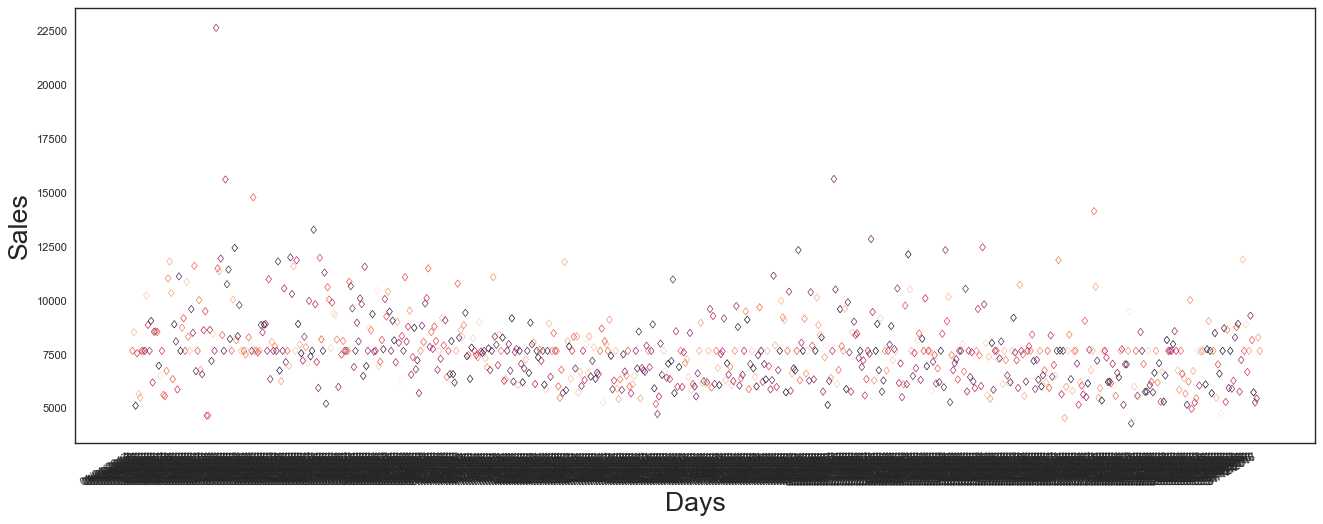

In [15]:
import datetime
import random
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80

#x = sampleStore['Date'][:100]
#y = sampleStore['NumberOfSales'][:100]
x = sampleStore['Date']
y = sampleStore['NumberOfSales']

plt.xlabel("Days")
plt.ylabel("Sales")

colors = np.random.rand(*x.shape)
# plot
plt.scatter(x, y, c=colors, marker=r'$\diamondsuit$', alpha=0.8)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

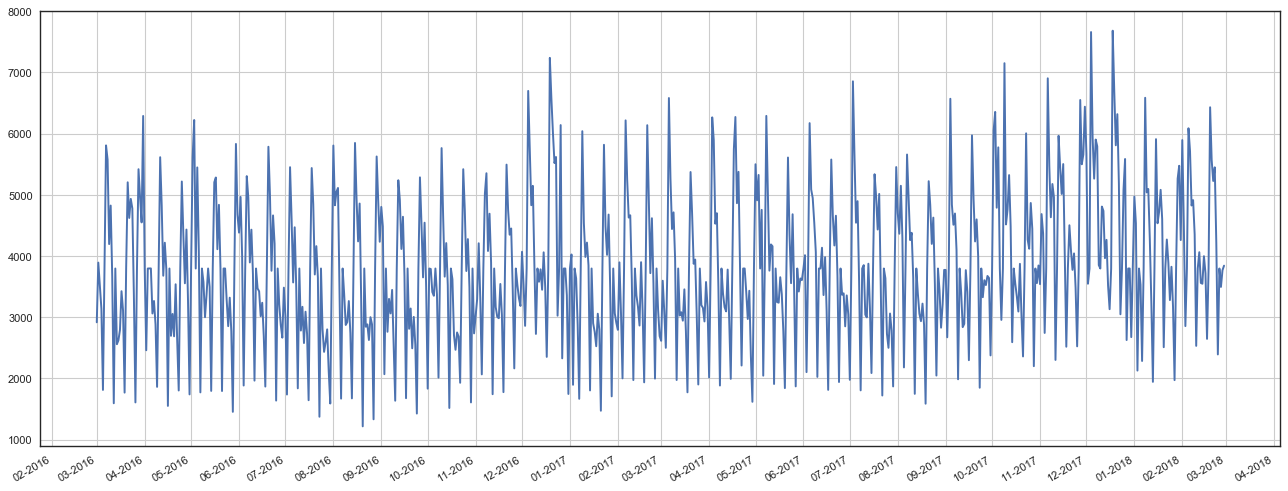

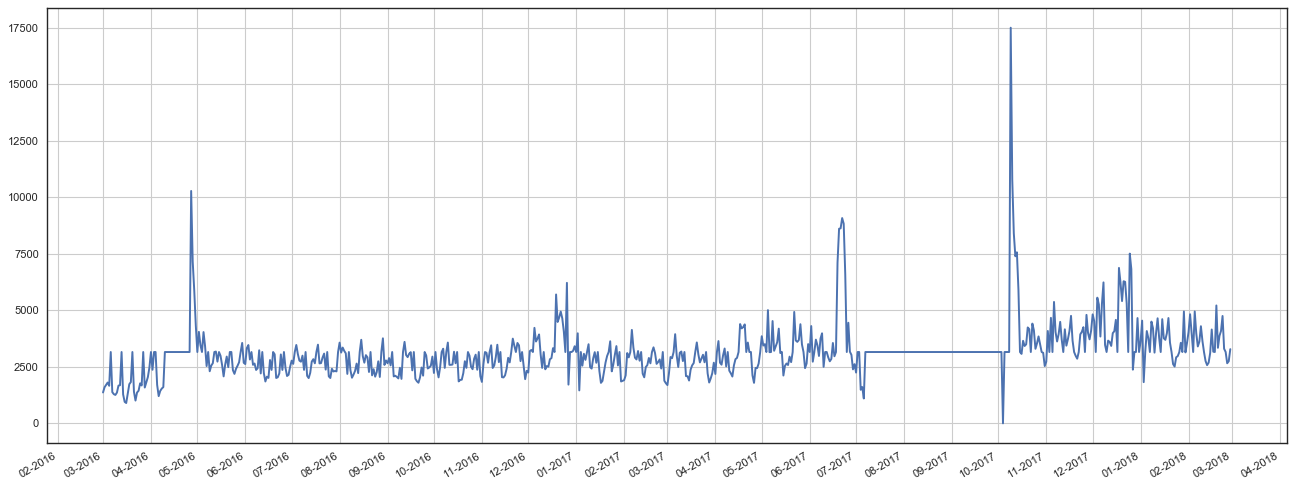

In [16]:
plot_storeNo(1023)
plot_storeNo(1001)

#### Imputation results checks

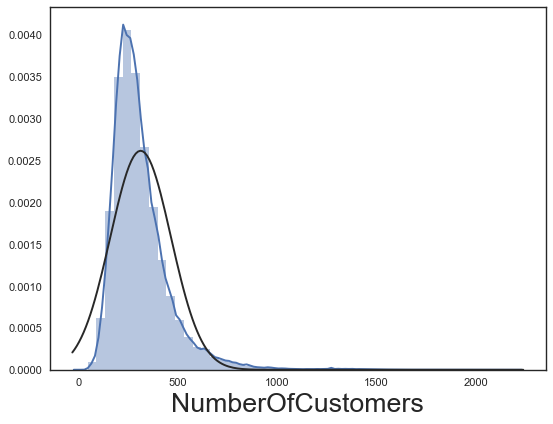

In [17]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# fit the data with a normal distribution
sns.distplot(df['NumberOfCustomers'] , fit=norm)

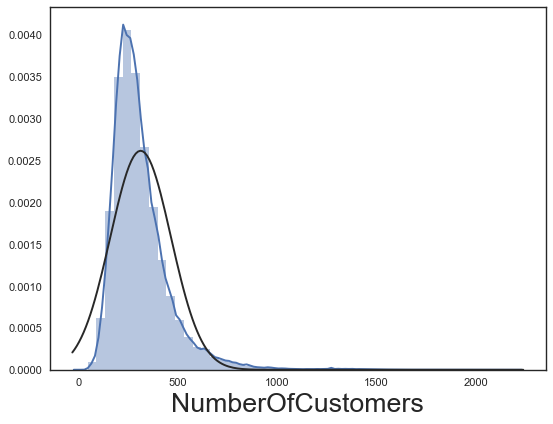

In [18]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# fit the data with a normal distribution
sns.distplot(df['NumberOfCustomers'] , fit=norm)

Now we don't have anymore instances where the Store is closed. We visualize again the distribution of 'NumberOfCustomers'

We visualize also the distribution of 'NumberOfSales' considering that the instancies where the Store was closed are already been removed

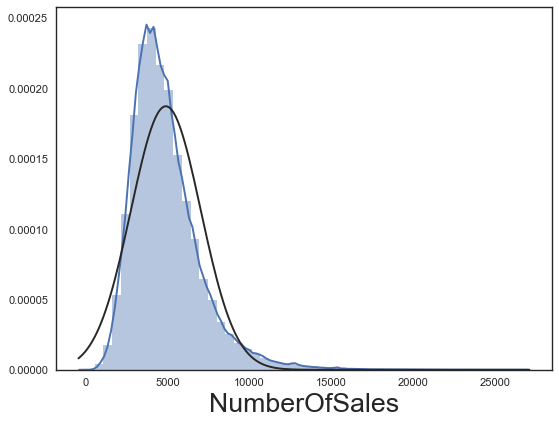

In [19]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# fit the data with a normal distribution
sns.distplot(df['NumberOfSales'] , fit=norm)

### CloudCover attribute processing

Similarly, noticing that in CloudCover the values range from 1 to 9 but on the library is written that have a range 0-9 we assume that the missing values mean 0 level of covering

In [20]:
df["CloudCover"] = df["CloudCover"].fillna(0)

### Min_VisibilitykM, Mean_VisibilityKm and Max_VisibilityKm attributes processing

Now let's analyse Min_VisibilitykM, Mean_VisibilityKm and Max_VisibilityKm

In [21]:
Min_Visibility_missing = df[df.Min_VisibilitykM.isnull()]
print("number of Min_VisibilitykM.isnull")
Min_Visibility_missing.shape[0]

number of Min_VisibilitykM.isnull


11338

In [22]:
# we compute the intersection between instances where Min_Visibilityand and Max_Visibility are missing
Max_Visibility_missing = df[df.Max_VisibilityKm.isnull()]
vis = Min_Visibility_missing.merge(Max_Visibility_missing)
print("Min_VisibilitykM.isnull AND Max_VisibilityKm.isnull")
vis.shape[0]

Min_VisibilitykM.isnull AND Max_VisibilityKm.isnull


11338

In [23]:
# we intersect vis with the instances where Mean_Visibility is missing too
Mean_Visibility_missing = df[df.Mean_VisibilityKm.isnull()]
vis = vis.merge(Mean_Visibility_missing)

print("Min_VisibilitykM.isnull AND Max_VisibilityKm.isnull AND Mean_VisibilityKm.isnull")
vis.shape[0]

Min_VisibilitykM.isnull AND Max_VisibilityKm.isnull AND Mean_VisibilityKm.isnull


11338

we notice that alla the dataframes have the same count. This means that when one of these 3 atributes is missing also the other ones are missing.
We try to understand if the missing triples focus on a particoular region/period/Store because, if that, we have to deal with them carefully to not indroduce bias in the dataset.

In [24]:
# plt.figure(figsize=(8, 6))
# sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})
a = iter(list(range(7)))
for i in a:
   # vis_gb=vis.groupby(['Region']).count()
    vis_gb = vis[vis.Region == i]
    print('region %d, number of missing triples:' % i )
    print(vis_gb.shape[0])

region 0, number of missing triples:
660
region 1, number of missing triples:
528
region 2, number of missing triples:
3375
region 3, number of missing triples:
828
region 4, number of missing triples:
54
region 5, number of missing triples:
1071
region 6, number of missing triples:
900


the missing triples do not focus on a single region, now we have to impute them.

To do so, we use the **median of the region in that day**

In [25]:
df["Mean_VisibilityKm"] = df.groupby(["Region", "Date"])["Mean_VisibilityKm"].transform(lambda x: x.fillna(x.median())).reset_index()

In [26]:
df["Max_VisibilityKm"] = df.groupby("Region")["Max_VisibilityKm"].transform(lambda x: x.fillna(x.median())).reset_index()

In [27]:
df["Min_VisibilitykM"] = df.groupby("Region")["Min_VisibilitykM"].transform(lambda x: x.fillna(x.median())).reset_index()

In [28]:
df.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees,Day,DayOfYear,Month,Year
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495.000000,...,70,1029,1,0.0,0.0,23,1,61,3,2016
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608.000000,...,58,1025,1,1.0,0.0,56,2,62,3,2016
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665.000000,...,55,1023,2,2.0,0.0,22,4,64,3,2016
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630.000000,...,25,1022,-1,3.0,0.0,108,5,65,3,2016
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,622.769231,...,48,1022,-5,4.0,0.0,46,6,66,3,2016


## Final check

Let's check again how much are the remaining missing ratios

In [29]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': df_na})
missing_data.head(10)

,Missing Ratio


### Write to file

In [30]:
# save the imputed dataset
df.to_csv('./dataset/preprocessed1_imputation_train.csv', index=False)